<font>We are going to make a text classification project using **spacy word embedding**</font>
<font>It comes under **multi-class** classification problem</font>

In [294]:
import pandas as pd

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 33-34: malformed \N character escape
<p></p>
just change '\' -> '/'

In [295]:
df = pd.read_json("D:/ML Coding Ninza/Coding/Dataset/News_Category_Dataset_v3.json",lines=True)

In [296]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [297]:
print(df.shape)
df.head()


(209527, 6)


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [298]:
df = df.drop(['link' , 'headline', 'authors','date'], axis=1 )

In [299]:
df.shape

(209527, 2)

In [300]:
df.category.value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [301]:
df.category

0         U.S. NEWS
1         U.S. NEWS
2            COMEDY
3         PARENTING
4         U.S. NEWS
            ...    
209522         TECH
209523       SPORTS
209524       SPORTS
209525       SPORTS
209526       SPORTS
Name: category, Length: 209527, dtype: object

Now we want only BUSINESS, SPORTS and CRIME dataset
so we can use 
<font><p>**df[df.category.isin(['BUSINESS', 'SPORTS', 'CRIME'])]</p>**<font/>
or we can use function 

In [302]:
# df = df[df.category.isin(['BUSINESS', 'SPORTS', 'CRIME',])]

In [303]:
def func(x):
    if x=='BUSINESS' or x=='SPORTS' or x=='CRIME':
        return x
    else:
        return 0

In [304]:
df.shape

(209527, 2)

In [305]:
df['category'] = df['category'].apply(func)

In [306]:
df.category.value_counts()

0           194896
BUSINESS      5992
SPORTS        5077
CRIME         3562
Name: category, dtype: int64

In [307]:
df.drop(df[df['category']==0].index, inplace =True) #.index returns the indes label of the filtered Dataframe
print(df.shape)
df.category.value_counts()

(14631, 2)


BUSINESS    5992
SPORTS      5077
CRIME       3562
Name: category, dtype: int64

In [308]:
#make a new target variable with a in which we assign the category column's values in number, 
#so that we can use it in ML model.
df['target'] = df.category.map({
    'BUSINESS' : 0, 
    'SPORTS' : 1,
    'CRIME' : 2
})

In [309]:
df = df.sample(12000).reset_index(drop = True)

In [310]:
df.category.value_counts()

BUSINESS    4927
SPORTS      4139
CRIME       2934
Name: category, dtype: int64

In [311]:
df.head()

,category,short_description,target
0,CRIME,Some people will do anything for a Five Guys b...,2
1,CRIME,,2
2,BUSINESS,New technology offers a glimpse into what 21st...,0
3,BUSINESS,"“Good things come in threes,"" she told azfamil...",0
4,SPORTS,Scroll down for LIVE updates. Stanley Cup Fina...,1


**Preprocessing the Text using spacy**

In [312]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [321]:
#make a function for preprocessing
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if(token.is_stop or token.is_punct):
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)


In [322]:
df.head()

,category,short_description,target
0,CRIME,Some people will do anything for a Five Guys b...,2
1,CRIME,,2
2,BUSINESS,New technology offers a glimpse into what 21st...,0
3,BUSINESS,"“Good things come in threes,"" she told azfamil...",0
4,SPORTS,Scroll down for LIVE updates. Stanley Cup Fina...,1


In [323]:
df['preprocessed_text'] = df['short_description'].apply(preprocess)

In [359]:
df.head()

,category,short_description,target,preprocessed_text,vector
0,CRIME,Some people will do anything for a Five Guys b...,2,people guy burger allegedly,"[-1.82685, 0.5247851, -3.92625, 0.4604175, 0.9..."
1,CRIME,,2,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,BUSINESS,New technology offers a glimpse into what 21st...,0,new technology offer glimpse 21st century urba...,"[0.46615705, 0.29726297, 0.90944016, -0.635389..."
3,BUSINESS,"“Good things come in threes,"" she told azfamil...",0,good thing come three tell azfamily.com compar...,"[-1.1675137, -0.6381413, -1.2195907, 0.8574025..."
4,SPORTS,Scroll down for LIVE updates. Stanley Cup Fina...,1,scroll live update Stanley Cup Final Game 2 Lo...,"[-0.85084945, -1.2317462, 0.46607557, 3.039693..."


In [326]:
sent = df.preprocessed_text[4]
sent

'scroll live update Stanley Cup Final Game 2 Los Angeles king vs. New Jersey Devils Prudential Center Newark'

In [333]:
s1 = nlp(sent)
s1.vector


array([-8.50849450e-01, -1.23174620e+00,  4.66075569e-01,  3.03969312e+00,
        1.99327362e+00,  6.11599505e-01,  1.01598489e+00,  5.58894455e-01,
        3.16223890e-01, -1.79702178e-01,  5.13774395e-01,  1.33917993e-02,
        3.70906085e-01,  1.51993558e-01, -3.15370679e-01,  1.43882525e+00,
        1.47073627e+00,  5.48302889e-01, -3.30321640e-01, -3.46350670e-01,
        9.89193618e-01, -2.48586312e-02,  7.35997379e-01,  3.93440545e-01,
        3.70671690e-01, -5.93599379e-01, -3.35482478e+00,  9.92555618e-02,
        2.04163742e+00, -1.62466634e-02,  6.67273283e-01,  2.65309334e+00,
        5.94796062e-01, -3.59273028e+00, -7.48782754e-01, -7.44496107e-01,
        8.39033052e-02, -5.24597406e-01, -1.76070428e+00,  8.21760744e-02,
        3.74245077e-01,  8.87363374e-01, -1.60845780e+00,  2.18134260e+00,
       -1.58350945e+00,  1.94761086e+00, -3.26535292e-02,  1.10327840e+00,
        1.61480796e+00, -2.03398466e+00,  4.51320797e-01,  2.70844603e+00,
       -7.50846744e-01,  

In [334]:
#make a function for using spacy word embedding
def word_vector(sent):
    doc = nlp(sent)

    return doc.vector

In [336]:
word_vector(df.preprocessed_text[2])

array([ 0.46615705,  0.29726297,  0.90944016, -0.6353899 ,  1.577297  ,
        0.02983804,  1.96117   ,  3.55059   , -2.411909  ,  0.04512302,
        4.16825   ,  1.398948  , -5.5330896 ,  1.6887531 ,  2.326822  ,
        0.76940906,  2.544241  , -0.10861196, -1.536207  , -1.1405494 ,
        0.95977604,  1.7430321 , -0.37364098, -1.0885929 ,  0.09457402,
       -0.60124004, -1.7158296 , -1.2495109 ,  0.22063093,  3.2462916 ,
       -0.45342907, -1.0789459 ,  0.36818498, -3.48445   , -0.18314722,
       -1.021645  , -0.06800099,  1.5658791 ,  0.35774598, -0.51078016,
       -0.74785995,  0.90481997, -0.11579704, -0.80860597, -2.588742  ,
        3.637682  , -0.03748194, -0.2558971 ,  0.52925605, -0.02968006,
       -0.38586098,  2.578588  , -1.2326645 , -4.8964505 ,  0.35634   ,
       -0.292687  ,  0.7809044 ,  1.4034721 ,  2.0207093 , -1.1850255 ,
        1.0876751 ,  0.52217513,  0.46150804, -2.2604294 ,  1.236103  ,
        3.15318   , -3.362331  , -4.8165903 ,  0.695082  ,  0.61

In [338]:
df['vector'] = df['preprocessed_text'].apply(word_vector)

In [360]:
df.head()

,category,short_description,target,preprocessed_text,vector
0,CRIME,Some people will do anything for a Five Guys b...,2,people guy burger allegedly,"[-1.82685, 0.5247851, -3.92625, 0.4604175, 0.9..."
1,CRIME,,2,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,BUSINESS,New technology offers a glimpse into what 21st...,0,new technology offer glimpse 21st century urba...,"[0.46615705, 0.29726297, 0.90944016, -0.635389..."
3,BUSINESS,"“Good things come in threes,"" she told azfamil...",0,good thing come three tell azfamily.com compar...,"[-1.1675137, -0.6381413, -1.2195907, 0.8574025..."
4,SPORTS,Scroll down for LIVE updates. Stanley Cup Fina...,1,scroll live update Stanley Cup Final Game 2 Lo...,"[-0.85084945, -1.2317462, 0.46607557, 3.039693..."


<font font size="6px" color= "Blue">Model training</font>

In [349]:
from sklearn.model_selection import train_test_split

using bag of words

In [434]:
X_train, X_test, y_train, y_test= train_test_split(df.short_description, df.target, test_size = 0.2, random_state = 2002)

In [438]:
X_train.shape, X_test.shape

((9600,), (2400,))

<font font size="6px" color= "red">K Nearest Neighbour Classifier</font>

In [457]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [458]:
clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf1 = MultinomialNB()


In [459]:
#import countvectorizer for bag of words
from sklearn.feature_extraction.text import CountVectorizer

In [460]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
X_train_cv.shape, X_test_cv.shape

((9600, 16525), (2400, 16525))

In [461]:
cv.get_feature_names_out([1, 5])

array(['00', '000', '0000', ..., 'zuzanna', 'zuzu', 'zywicki'],
      dtype=object)

In [462]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [468]:
clf.fit(X_train_cv, y_train)

KNeighborsClassifier(metric='euclidean')

In [469]:
y_pred = clf.predict(X_test_cv)

In [470]:
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.42      0.26      0.32      1002
           1       0.33      0.63      0.43       824
           2       0.34      0.11      0.17       574

    accuracy                           0.35      2400
   macro avg       0.36      0.33      0.31      2400
weighted avg       0.37      0.35      0.32      2400



0.3516666666666667

using word embedding

In [471]:
X_train, X_test, y_train, y_test= train_test_split(df.vector, df.target, test_size = 0.2, random_state = 2002)

In [472]:
X_train.shape, X_test.shape

((9600,), (2400,))

In [473]:
# make a 2-d vector using numpy stack
import numpy as np
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)
X_train_2d.shape, X_test_2d.shape

((9600, 300), (2400, 300))

In [484]:
X_train_2d[0].size
X_train_2d[10]

array([ 2.08900034e-01,  7.90354788e-01, -4.01833147e-01, -5.18750012e-01,
        2.06934619e+00,  5.79717636e-01,  1.52272388e-01,  3.08135009e+00,
        1.19578004e+00,  1.46414256e+00,  1.20449328e+00,  5.84037423e-01,
       -1.79833245e+00,  2.21467555e-01,  5.26603997e-01,  5.42646289e-01,
       -6.77438796e-01,  1.29816258e+00,  6.29975379e-01, -6.25894904e-01,
        1.03065860e+00,  3.08369994e-01,  2.00464630e+00, -1.95921242e-01,
       -7.43736446e-01, -1.12346292e-01, -2.38189387e+00, -1.78906000e+00,
        7.38749981e-01,  1.20572996e+00,  2.65397489e-01,  3.18515003e-01,
        8.53244066e-02, -1.44891131e+00, -8.31946254e-01, -1.34275866e+00,
       -6.72364950e-01,  2.80136228e-01, -2.55365014e-01, -5.03412545e-01,
       -1.14773524e+00, -9.59487498e-01,  1.69325495e+00,  1.66961238e-01,
        4.29253727e-01,  4.17677611e-01, -3.06072503e-01,  2.75316268e-01,
       -5.77652514e-01, -2.79631257e-01,  8.64398718e-01, -8.35962474e-01,
       -2.82207489e-01, -

In [490]:
clf.fit(X_train_2d, y_train)

KNeighborsClassifier(metric='euclidean')

In [491]:
y_pred1 = clf.predict(X_test_2d)

In [492]:
print(classification_report(y_test, y_pred1))
accuracy_score(y_test, y_pred1)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1002
           1       0.85      0.55      0.67       824
           2       0.53      0.74      0.62       574

    accuracy                           0.68      2400
   macro avg       0.70      0.68      0.67      2400
weighted avg       0.72      0.68      0.68      2400



0.6816666666666666

using MultinomialNB

In [493]:
from sklearn.preprocessing import MinMaxScaler

In [498]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.transform(X_test_2d)

In [500]:
clf1.fit(X_train_scaled, y_train)

MultinomialNB()

In [501]:
y_pred = clf1.predict(X_test_scaled)

In [502]:
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.57      0.79      0.66      1002
           1       0.52      0.60      0.55       824
           2       0.89      0.08      0.15       574

    accuracy                           0.56      2400
   macro avg       0.66      0.49      0.46      2400
weighted avg       0.63      0.56      0.50      2400



0.55625

using random forest 

In [504]:
from sklearn.ensemble import RandomForestClassifier

In [505]:
clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

In [506]:
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.69      0.88      0.77      1002
           1       0.77      0.69      0.73       824
           2       0.81      0.53      0.64       574

    accuracy                           0.73      2400
   macro avg       0.76      0.70      0.72      2400
weighted avg       0.75      0.73      0.73      2400



0.7345833333333334

using gradient boosting classifier

In [507]:
from sklearn.ensemble import GradientBoostingClassifier

In [508]:
clf = GradientBoostingClassifier()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)


In [509]:
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.71      0.88      0.78      1002
           1       0.80      0.71      0.75       824
           2       0.79      0.58      0.67       574

    accuracy                           0.75      2400
   macro avg       0.77      0.72      0.74      2400
weighted avg       0.76      0.75      0.75      2400



0.7508333333333334

In [518]:
#finally print the confusion matrix for the best model: GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

In [521]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[883,  78,  41],
       [192, 585,  47],
       [176,  64, 334]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

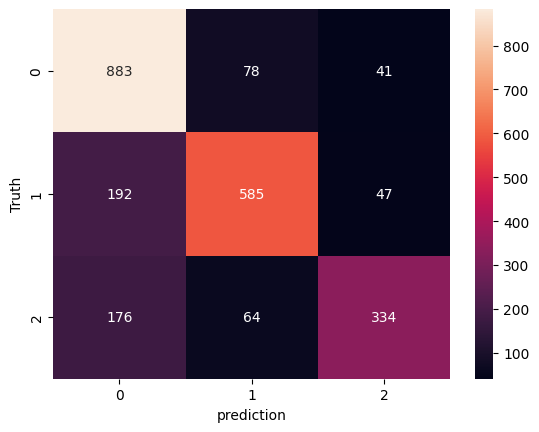

In [523]:
plt.Figure(figsize=(10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('Truth')
